# Quickstart

First, install `scpviz` and import the modules. We also download the files to here.

In [ ]:
!pip install scpviz

In [1]:
from scpviz import pAnnData as pAnnData
from scpviz import plotting as scplt
from scpviz import utils as scutils

c:\Users\srpang\anaconda3\envs\py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Import

Proteomics data is stored in a `pAnnData` object. `scpviz` currently supports two data formats: **Proteome Discoverer** (Thermo Fisher) and **DIA-NN** reports.

## PD import

In [ ]:
!wget -q https://github.com/gnaprs/scpviz/raw/main/docs/assets/pd32_Proteins.txt
!wget -q https://github.com/gnaprs/scpviz/raw/main/docs/assets/pd32_PeptideSequenceGroups.txt

In [ ]:
obs_columns = ['Sample','cellline','treatment','condition','duration']

pdata = pAnnData.import_data(source_type='pd', prot_file = 'pd32_Proteins.txt', pep_file='pd32_PeptideSequenceGroups.txt', obs_columns=obs_columns)


🧭 [USER] Importing data of type [pd]
--------------------------
Starting import [Proteome Discoverer]

Source file: ../assets/pd32_Proteins.txt / ../assets/pd32_PeptideSequenceGroups.txt
Number of files: 12
Proteins: 10393
Peptides: 167114

ℹ️ Using 'Modifications in Master Proteins' for modification annotation.
     ⚠️ [WARN] Master proteins in the peptide matrix do not match proteins in the protein data, please check if files correspond to the same data.
     ℹ️ [INFO] If using PD3.2, this is a known issue due to changed protein grouping rules.

ℹ️ 73 proteins with missing gene names.
     🌐 [API] Querying UniProt for batch 1/1 (73 proteins) [fields: accession, gene_primary]
     ✅ Retrieved UniProt metadata for 71 entries.
     ✅ [OK] Recovered 70 gene name(s) from UniProt. Genes found:
         PCM1, HDLBP, GBF1, WDR36, DDX27, MTCL2, ATAD3A, SLC4A1AP, COG5, DBT...
     ⚠️ [WARN] 3 gene name(s) still missing. Assigned as 'UNKNOWN_<accession>' for:
         A0A0B4J2D5, Q6ZSR9, A9Z1Z3

## DIA-NN import

In [ ]:
# warning: this file is 200+ MB large, and may take a while to download and load
!wget -q https://github.com/gnaprs/scpviz/raw/main/docs/assets/diann_report.parquet

In [ ]:
obs_columns = ['user', 'date', 'ms', 'acquisition', 'column', 'duration', 'amount', 'cellline', 'sample', 'replicate']

pdata_diann = pAnnData.import_data(source_type='diann', report_file = 'diann_report.parquet', obs_columns=obs_columns)


🧭 [USER] Importing data of type [diann]
--------------------------
Starting import [DIA-NN]

Source file: ../assets/diann_report.parquet
Number of files: 12
Proteins: 12652
Peptides: 251047

     ℹ️ [INFO] Using sampl-specific q-values for 'prot' significance annotation.
     ℹ️ [INFO] Using sampl-specific q-values for 'pep' significance annotation.

ℹ️ RS matrix: (12652, 251047) (proteins × peptides), sparsity: 99.99%
   - Proteins with ≥2 *unique* linked peptides: 11214/12652
   - Peptides linked to ≥2 proteins: 257/251047
   - Mean peptides per protein: 19.87
   - Mean proteins per peptide: 1.00
     ✅ [OK] pAnnData object is valid.
     ✅ [OK] Import complete. Use `print(pdata)` to view the object.
--------------------------


In [18]:
pdata.summary

,Sample,cellline,treatment,condition,duration,protein_quant,protein_count,protein_abundance_sum,mbr_count,high_count,peptide_quant,peptide_count,peptide_abundance_sum,unique_pep2_protein_count
F4,Sample,AS,RA,kd,d7,0.929472,9660,8.030133e+10,0,9653,0.836513,139793,8.029744e+10,9460
F5,Sample,AS,RA,kd,d7,0.925238,9616,1.027993e+11,0,9619,0.840360,140436,1.028033e+11,9420
F6,Sample,AS,RA,kd,d7,0.927836,9643,9.066725e+10,0,9638,0.807646,134969,9.068236e+10,9443
F10,Sample,AS,RA,sc,d7,0.904166,9397,4.078257e+10,0,9396,0.641335,107176,4.081629e+10,9238
F11,Sample,AS,RA,sc,d7,0.920620,9568,5.843762e+10,0,9581,0.710084,118665,5.857828e+10,9389
F12,Sample,AS,RA,sc,d7,0.881459,9161,2.939409e+10,0,9167,0.562113,93937,2.941074e+10,9022
F16,Sample,BE,RA,kd,d7,0.947465,9847,9.022711e+10,0,9861,0.844561,141138,9.026093e+10,9643
F17,Sample,BE,RA,kd,d7,0.942269,9793,8.304290e+10,0,9783,0.793051,132530,8.314867e+10,9591
F18,Sample,BE,RA,kd,d7,0.948331,9856,8.971543e+10,0,9864,0.844783,141175,8.973545e+10,9641
F22,Sample,BE,RA,sc,d7,0.942942,9800,7.545933e+10,0,9806,0.747891,124983,7.554042e+10,9619


## Pre-processing

### Filtering

File **F23** shows a markedly low protein count (~1700) compared to ~9000 in all other samples.
This file is an outlier and should be removed prior to downstream analysis.

Two filtering approaches can be used to achieve the same result:

#### Filter by protein count

In [19]:
pdata = pdata.filter_sample(min_prot=8000)

🧭 [USER] Filtering samples [condition]:
    Returning a copy of sample data based on condition:
     🔸 Condition: protein_count >= 8000
     ℹ️ Auto-cleanup: No empty proteins found (all-NaN or all-zero).
    → Samples kept: 11, Samples dropped: 1
    → Proteins kept: 10393



#### OR Exclude by filename

In [ ]:
pdata = pdata.filter_sample(exclude_file_list=['F23'])

🧭 [USER] Filtering samples [file list]:
    Returning a copy of sample data based on file list:
     🔸 Files requested (excluding): 1
     ℹ️ Auto-cleanup: No empty proteins found (all-NaN or all-zero).
    → Samples kept: 11, Samples dropped: 1
    → Proteins kept: 10393



After filtering, the dataset now contains **11 samples**.  

### Quick visualization
#### Protein Abundance
Visualize proteins of interest across samples:

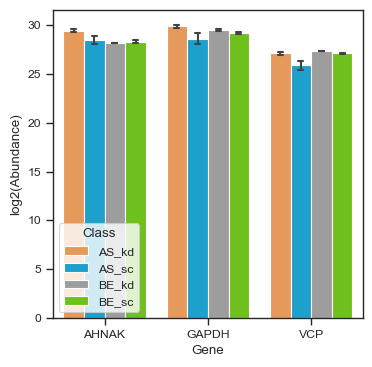

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4))
pdata.plot_abundance(ax, namelist=["GAPDH", "VCP", "AHNAK"], classes=["cellline","condition"])
plt.show()

#### PCA
Alternatively, we can explore the PCA embeddings to get an overview of sample clustering.
Other dimensionality reduction methods such as UMAP and t-SNE can also be used. The samples appear well-clustered by both cell line and condition, suggesting good reproducibility and biological separation.

     ℹ️ [INFO] Computing PCA (force=False)...
🧭 [USER] Performing PCA [protein] using layer: X, removing NaN features.
   🔸 BEFORE (samples × proteins): (11, 10393)
   🔸 AFTER  (samples × proteins): (11, 8444)
     ✅ PCA complete, fitted on X. Results stored in:
       • .prot.obsm['X_pca']
       • .prot.uns['pca'] (includes PCs, variance, variance ratio)
       • Variance explained by PC1/PC2: 59.94% , 26.68%


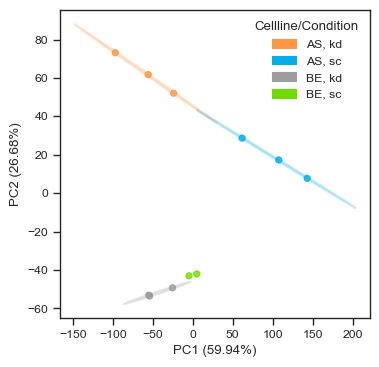

In [21]:
fig, ax = plt.subplots(figsize = (4,4))
ax = scplt.plot_pca(ax, pdata, classes=["cellline","condition"], add_ellipses=True)

#### CV
Finally, we can examine the coefficient of variation (CV) of each sample.
Here, the samples show overall low variability (median ~0.1), with slightly higher CVs observed in the AS_sc group (~0.35).

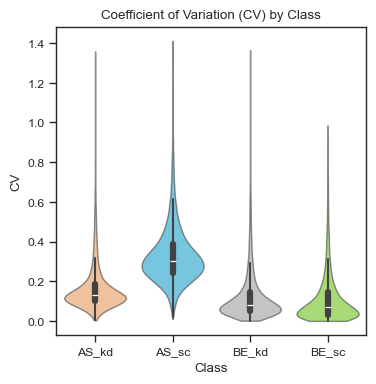

In [22]:
fig, ax = plt.subplots(figsize = (4,4))
ax = scplt.plot_cv(ax, pdata, classes=["cellline","condition"])

### Normalization and Imputation

Biological and technical variation across samples (e.g., in the AS_sc group) can arise from sample processing or data acquisition. Normalize your data to reduce variation between samples — for example, using median scaling.  

In [23]:
pdata.normalize(method='median')

🧭 [USER] Global normalization using 'median'. Layer will be saved as 'X_norm_median'.
     ✅ Normalized all 11 samples.
     ℹ️ Set protein data to layer X_norm_median.


In [24]:
pdata.impute(method="min")

🧭 [USER] Global imputation using 'min'. Layer saved as 'X_impute_min'. Minimum scaled by 1.
     ✅ 8234 values imputed.
     ℹ️ 11 samples fully imputed, 0 samples partially imputed, 0 skipped feature(s) with all missing values.
     ℹ️ Set protein data to layer X_impute_min.


After normalization, CVs for the **AS_sc** group improve compared to pre-normalized data. Other imputation methods are also available, including KNN, median, and minimum with a scaling factor. 

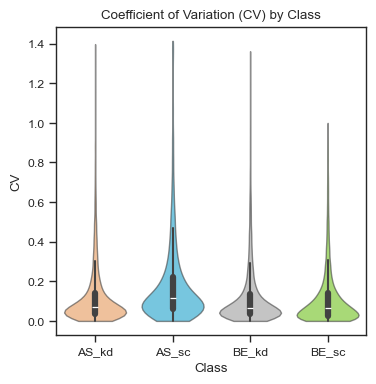

In [25]:
fig, ax = plt.subplots(figsize = (4,4))
ax = scplt.plot_cv(ax, pdata, classes=["cellline","condition"])

## Differential expression

### Volcano Plots

Run a **differential expression (DE)** analysis, commonly visualized with volcano plots. To start, we define a *comparison ratio*: for instance, comparing cell line BE under the kd condition against cell line BE under sc.

🧭 [USER] Running differential expression [protein]
   🔸 Comparing groups: [{'cellline': 'BE', 'condition': 'kd'}] vs [{'cellline': 'BE', 'condition': 'sc'}]
   🔸 Group sizes: 3 vs 2 samples
   🔸 Method: ttest | Fold Change: mean | Layer: X
   🔸 P-value threshold: 0.05 | Log2FC threshold: 1
     ✅ DE complete. Results stored in:
       • .stats["[{'cellline': 'BE', 'condition': 'kd'}] vs [{'cellline': 'BE', 'condition': 'sc'}]"]
       • Columns: log2fc, p_value, significance, etc.
       • Upregulated: 279 | Downregulated: 258 | Not significant: 9856


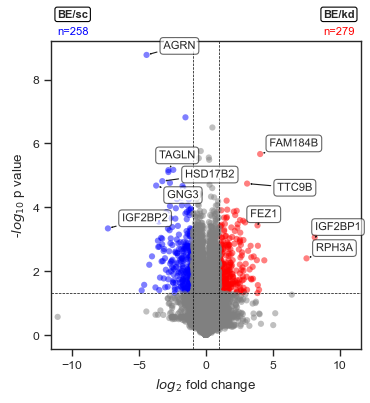

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
comparison_values=[{'cellline':'BE', 'condition':'kd'},{'cellline':'BE', 'condition':'sc'}]
ax = scplt.plot_volcano(ax, pdata, values=comparison_values)

Access the DE results stored in `.stats` under the key shown in the output.

In [ ]:
pdata.stats["[{'cellline': 'BE', 'condition': 'kd'}] vs [{'cellline': 'BE', 'condition': 'sc'}]"]

,Genes,"[{'cellline': 'BE', 'condition': 'kd'}]","[{'cellline': 'BE', 'condition': 'sc'}]",log2fc,p_value,test_statistic,-log10(p_value),significance_score,significance
O75864,PPP1R37,6.018913e+05,1.035515e+05,2.539155,0.011757,5.512106,1.929687,4.899775,upregulated
Q9UPX0,IGSF9B,4.389674e+05,1.936387e+05,1.180746,0.015932,4.937532,1.797742,2.122677,upregulated
Q8N6U8,GPR161,1.262130e+05,5.438048e+04,1.214700,0.010162,5.807605,1.993037,2.420941,upregulated
Q53EQ6,TIGD5,4.356898e+04,9.048042e+03,2.267624,0.023049,4.306395,1.637350,3.712894,upregulated
Q8N6N2,TTC9B,2.225771e+05,2.648270e+04,3.071183,0.000018,49.575748,4.742973,14.566539,upregulated
...,...,...,...,...,...,...,...,...,...
P41226,UBA7,4.847454e+04,1.770491e+05,-1.868850,0.169895,-1.798735,0.769819,-1.438677,not significant
Q8NF37,LPCAT1,6.178748e+06,7.139472e+06,-0.208503,0.179000,-1.746814,0.747147,-0.155782,not significant
Q96JK2,DCAF5,1.325323e+06,6.752197e+05,0.972916,0.000211,21.800467,3.675207,3.575666,not significant
Q9NQT5,EXOSC3,4.490186e+06,4.482020e+06,0.002626,0.975853,0.032856,0.010616,0.000028,not significant


### STRING enrichment

We can perform **STRING enrichment** on the sets of up- and downregulated proteins from our DE analysis. First, list the available enrichment keys:

In [ ]:
pdata.list_enrichments()

🧭 [USER] Listing STRING enrichment status

     ℹ️ Available DE comparisons (not yet enriched):
        - BE_kd vs BE_sc

  🔹 To run enrichment:
      pdata.enrichment_functional(from_de=True, de_key="...")

✅ Completed STRING enrichment results:
    (none)

✅ Completed STRING PPI results:
    (none)


Since we just ran a DE analysis, the key **`BE_kd vs BE_sc`** is available. We can run STRING **functional enrichment** on both up- and downregulated proteins.

In [ ]:
pdata.enrichment_functional(from_de=True, de_key="BE_kd vs BE_sc")

🧭 [USER] Running STRING enrichment [DE-based: [{'cellline': 'BE', 'condition': 'kd'}] vs [{'cellline': 'BE', 'condition': 'sc'}]]

🔹 Up-regulated proteins
     ℹ️ Found 0 cached STRING IDs. 150 need lookup.
          ℹ️ Cached 149 STRING IDs from UniProt API xref_string.
          ⚠️ No STRING mappings returned from STRING API.
   🔸 Proteins: 150 → STRING IDs: 149
   🔸 Species: 9606 | Background: None
     ✅ [OK] Enrichment complete (3.92s)
   • Access result: pdata.stats['functional']["BE_kd vs BE_sc_up"]["result"]
   • Plot command : pdata.plot_enrichment_svg("BE_kd vs BE_sc", direction="up")
   • View online  : https://string-db.org/cgi/network?identifiers=9606.ENSP00000351310%0d9606.ENSP00000356150%0d9606.ENSP00000301633%0d9606.ENSP00000336701%0d9606.ENSP00000278426%0d9606.ENSP00000221462%0d9606.ENSP00000369325%0d9606.ENSP00000482313%0d9606.ENSP00000160382%0d9606.ENSP00000359765%0d9606.ENSP00000291700%0d9606.ENSP00000370571%0d9606.ENSP00000418525%0d9606.ENSP00000444688%0d9606.ENSP0

Once enrichment is complete, you can visualize the **Gene Ontology (Biological Process)** results:

🧭 [USER] Fetching STRING SVG for key 'BE_kd vs BE_sc_down' (n=149)...


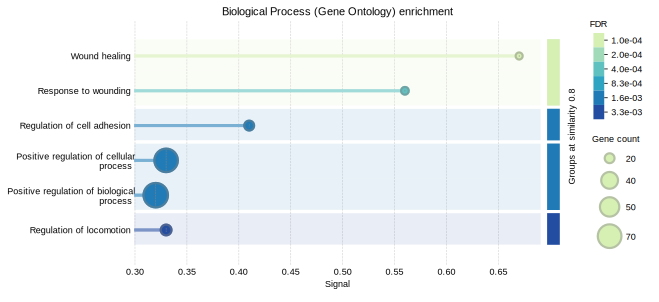

In [ ]:
pdata.plot_enrichment_svg("BE_kd vs BE_sc", direction="down")


## Next steps

For a complete workflow — from importing data to enrichment and network analysis — see the [Tutorial Index](https://gnaprs.github.io/scpviz/tutorials/).

- Learn more about **data import** in [Importing Data](https://gnaprs.github.io/scpviz/tutorials/importing/).  
- Explore **filtering options** in [Filtering](https://gnaprs.github.io/scpviz/tutorials/filtering/).  
- Explore normalization and imputation options in [Normalization & Imputation](https://gnaprs.github.io/scpviz/tutorials/imputation/).  
- Learn about differential expression and volcano plots in [Differential Expression](https://gnaprs.github.io/scpviz/tutorials/de/).  
- Perform functional and PPI enrichment in [STRING Enrichment](https://gnaprs.github.io/scpviz/tutorials/enrichment/).  
- See advanced visualization techniques in the [Plotting Tutorial](https://gnaprs.github.io/scpviz/tutorials/plotting/).
